# Tổng quan

- [1. Giới thiệu](#1.-Giới-thiệu)
- [2. Nội dung](#2.-Nội-dung)
- [3. Ý tưởng chính](#3.-Ý-tưởng-chính)
- [4. Demo đơn giản](#4.-Demo-đơn-giản)
- [5. Hạn chế](#5.-Hạn-chế)
- [6. Tài liệu tham khảo](#6.-Tài-liệu-tham-khảo)





## 1. Giới thiệu
Hồi quy tuyến tính (**Linear Regression**) là loại phân tích hồi quy đầu tiên được nghiên cứu và được sử dụng rộng rãi trong các ứng dụng thực tế, thực hiện nhiệm vụ dự đoán một giá trị biến phụ thuộc (**dependent variable**) $y$ dựa trên các biến độc lập (**independent variables**) $x$. Kỹ thuật hồi quy (Regression) này tìm ra mối quan hệ tuyến tính giữa $x$ (đầu vào) và $y$ (đầu ra). Nếu chúng ta vẽ biến độc lập ($x$) trên trục x và biến phụ thuộc ($y$) trên trục y, hồi quy tuyến tính sẽ cho chúng ta một đường thẳng phù hợp nhất với các điểm dữ liệu.


|![Hình minh hoạ](https://raw.githubusercontent.com/TheDuyIT/Introduce-to-machine-learing/master/images/1/regression.png)| 
|:--:| 
|*Hình minh họa*|


Hầu hết các ứng dụng của hồi quy tuyến tính thuộc một trong hai loại sau:
- Dự đoán, dự báo hoặc giảm lỗi. Ví dụ: dự đoán giá nhà dựa vào vị trí, diện tích,...
- Giải thích sự thay đổi của biến phụ thuộc do sự thay đổi của các biến độc lập. Ví dụ: giải thích mức độ ảnh hưởng của độ ẩm với lượng mưa.

# 2. Nội dung


Hồi quy tuyến tính là một thuật toán cơ bản trong học có giám sát (**supervised learning**). Với dữ liệu đầu vào là tập dữ liệu các biến phụ thuộc ($y$) và các biến độc lập ($x$), mục tiêu của thuật toán này là xây dựng mô hình quan hệ giữa các biến đó.
- $y$ là một vectơ của các giá trị biến phụ thuộc (giá trị đầu ra)
- $X$ là ma trận của vectơ hàng $x_i$ với n chiều $x_j$ là các biến độc lập (giá trị đầu vào)

Ví dụ: Liệu có thể dự đoán cân nặng của một người dựa vào chiều cao của họ không? (Giả sử cân nặng chỉ phụ thuộc vào chiều cao). Ta có bảng dữ liệu chiều cao và cân nặng của 15 người như sau:

![](https://raw.githubusercontent.com/TheDuyIT/Introduce-to-machine-learing/master/images/1/data.png)

Ta có $y$ sẽ là vectơ chứa giá trị các biến phụ thuộc (cân nặng), $X$ là ma trận của vectơ hàng $x_i$ với số chiều bằng 1 (chiều cao)

Mục đích của ta là sẽ xây dựng một mô hình dự đoán có dạng $y=f(x)$ với $x$ là 1 vectơ giá trị đầu vào

Như ta thấy thì với chiều cao càng lớn thì cân nặng cũng càng lớn. Một hàm đơn giản để mô tả mối quan hệ giữa các giá trị đầu vào:
$$y\approx f(x)=\hat{y}$$
$$f(x)=x_1w_1+w_0 \quad (1)$$
Với $w_1$ là hệ số, $w_0$ còn được gọi là *bias*. Bài toán hồi quy tuyến tính chính là đi tìm hệ số $w_1$.

$y$ là giá trị thực, $\hat{y}$ là giá trị dự đoán mà mô hình đưa ra

# 3. Ý tưởng chính


Ở phương trình (1), nếu ta đặt $w=[w_0,w_1]^T$ là vectơ các hệ số cần tối ưu, $x=[1,x_1]$ là vectơ biểu diễn dữ liệu đầu vào. Phương trình (1) có thể viết lại dưới dạng: $$y\approx xw=\hat{y}$$
Điều mà ta muốn là sai số dự đoán là nhỏ nhất. Hay cách khác là ta muốn giá trị của biểu thức sau càng nhỏ càng tốt:$$\frac{1}{2}(y-\hat{y})^2=\frac{1}{2}(y-xw)^2$$
Lưu ý: Ta lấy bình phương $y-\hat{y}$ vì $y-\hat{y}$ có thể âm nên việc nói sai số nhỏ nhất khi $y-\hat{y}$ âm là không đúng (Ví dụ: y = 1, $\hat{y} = 10$ thì $y-\hat{y}$ nhỏ nhưng sai số bằng 9). $\frac{1}{2}$ thêm vào để triệt tiêu khi lấy đạo hàm.

Bạn có thể tự đặt câu hỏi: tại sao không dùng $|y - \hat{y}|$ mà lại dùng $(y - \hat{y})^2$ ở đây?
Câu trả lời sẽ có ở phần sau!!!

Điều này tương tự với N cặp điểm dữ liệu (giá trị đầu vào,giá trị đầu ra) mà ta có. Ta muốn tổng sai số là nhỏ nhất, tương đương với việc tìm $w$ để hàm số sau đạt giá trị nhỏ nhất:
$$L(w)=\frac{1}{2}\sum_{i=0}^N(y_i-x_iw)^2$$
$L(w)$ được gọi là hàm mất mát (loss function) của mô hình hồi quy tuyến tính

Trước khi đi tìm lời giải cho bài toán thì ta đơn giản hóa hàm mất mát. Ta đặt $y=[y_1,y_2,...,y_N]$ là vectơ cột chứa tập các giá trị dữ liệu đầu ra (các biến phụ thuộc) của dữ liệu huấn luyện (trainning data), $X=[x_1,x_2,...,x_N]$ là ma trận trận đầu vào mà mỗi hàng là 1 điểm dữ liệu. Từ đó $L(w)$ sẽ được viết lại như sau: $$L(w)=\frac{1}{2}||y-Xw||_2^2 \quad (3)$$

#### Tìm nghiệm của bài toán
Có nhiều phương pháp giải bài toán này. Nhưng ở đây ta sẽ sử dụng một phương pháp phổ biến trong bài toán tối ưu là giải phương trình đạo hàm bằng 0 khi đạo hàm và giải phương trình đạo hàm bằng 0 không quá phức tạp.

Đạo hàm theo $w$ của hàm mất mát: $$\frac{\partial L(w)}{\partial w}=X^T(Xw-y)$$
Đến đây tôi xin quay lại câu hỏi ở phần trên về việc tại sao không dùng trị tuyệt đối mà lại dùng bình phương. Câu trả lời là hàm bình phương có đạo hàm tại mọi nơi, trong khi hàm trị tuyệt đối có đạo hàm không xác định tại 0.

Phương trình đạo hàm bằng 0 tương ứng với phương trình: $$X^TXw=X^Ty$$
Nếu ma trận $X^TX$ là ma trận vuông khả nghịch thì phương trình đạo hàm bằng 0 có nghiệm duy nhất là $w=(X^TX)^{-1}X^Ty$

Nếu ma trận $X^TX$ không khả nghịch (có định thức bằng 0) thì ta sẽ sử dụng giả nghịch đảo $(X^TX)^\dagger$ là trường hợp tổng quát của nghịch đảo khi ma trận không khả nghịch hoặc thậm chí không vuông.

Từ đó điểm tối ưu của bài toán chính là:  $$w=(X^TX)^\dagger X^Ty \quad (4)$$

Ngoài ra, để ước lượng giá trị w cho bài toán hồi quy tuyến tính người ta còn dùng phương pháp Gradient Decent.

# 4. Demo đơn giản


Quay lại với bài toán dự đoán cân nặng dựa trên chiều cao.

Ta sẽ quan sát dữ liệu trên một mặt phẳng.

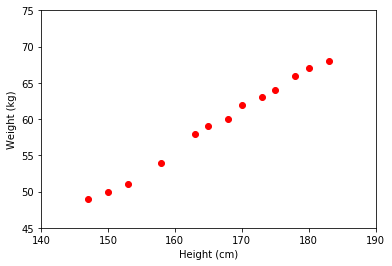

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Từ đồ thị này ta thấy rằng dữ liệu được sắp xếp gần như theo 1 đường thẳng, vậy mô hình hồi quy tuyến tính của ta nhiều khả năng sẽ cho kết quả tốt.

Ta sẽ tính nghiệm theo phương trình (4)

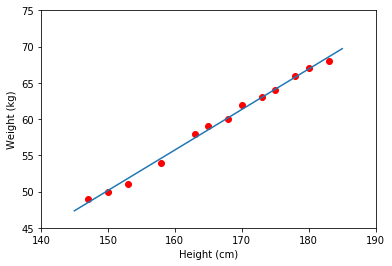

In [0]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b) # nghiệm theo công thức
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0
# vẽ đường thẳng tuyến tính tìm được
plt.plot(X.T, y.T, 'ro')
plt.plot(x0, y0)
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Từ đồ thị bên trên ta thấy rằng các điểm dữ liệu màu đỏ nằm khá gần đường thẳng dự đoán màu xanh. Vậy mô hình hồi quy tuyến tính hoạt động tốt với tập dữ liệu training.

Sau đây ta sẽ sử dụng mô hình để dự đoán cân nặng cho người có chiều cao là 180 (cm)

In [0]:
y1 = w_1*180 + w_0
print("Cân nặng dự đoán của người cao 180 cm là: %.2f"%(y1))

Cân nặng dự đoán của người cao 180 cm là: 66.92


# 5. Hạn chế




Hồi quy tuyến tính có nhược điểm là rất nhạy cảm với dữ liệu nhiễu. Vì chỉ cần với một điểm dữ liệu bị nhiễu thì mô hình sẽ sai lệch rất nhiều.


|![Dữ liệu nhiễu](https://raw.githubusercontent.com/TheDuyIT/Introduce-to-machine-learing/master/images/1/noise_data.png)| 
|:--:| 
|*Dữ liệu nhiễu*|



 Ngoài ra, hồi quy tuyến tính không biểu diễn được các mô hình phức tạp.

# 6. Tài liệu tham khảo

$^{[1]}$ [Machine learning cơ bản](https://machinelearningcoban.com/2016/12/28/linearregression/)

$^{[2]}$ [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression)

$^{[3]}$ [Towardsdatascience](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)
